it is better to use the file they used than the one I've downloaded

- Create Fedyk Portfolio to check specification

In [15]:
import numpy as np

from src import Analyzer
from src.utils.params import ReturnParams

return_params = ReturnParams(
    start_date=None,
    cumulative=True,
    append_start=False
)

an_fedyk_all = Analyzer(compare_tickers=[], return_params=return_params, stocks_only=False, weights_application="wealth", dl_kwargs={"weights_method":"dollar"})
an_mine = Analyzer(compare_tickers=[], return_params=return_params, stocks_only=False, weights_application="number", dl_kwargs={"weights_method":"dollar"})

r_fedyk, h_fedyk = an_fedyk_all.build_returns()
r_fedyk = np.exp(r_fedyk)-1
r_mine, h_mine = an_mine.build_returns()
r_mine = np.exp(r_mine)-1


2025-04-28 18:05:13,596 - src.analyzer - INFO - ############################## Analysis Started ############################## (analyzer.py:83)
2025-04-28 18:05:20,298 - src.analyzer - INFO - ############################## Analysis Started ############################## (analyzer.py:83)
2025-04-28 18:05:24,140 - src.analyzer - WARNING - Empty dataframe produced for tickers: [] (analyzer.py:175)
2025-04-28 18:05:24,417 - src.analyzer - WARNING - Empty dataframe produced for tickers: [] (analyzer.py:175)


- read factor file

In [16]:
import pandas as pd
from config.constants import PROJECT_ROOT

file_dir = f"{PROJECT_ROOT}\\data\\models\\f-f_research_data_5_factors_2x3_daily.csv"
df_factor = pd.read_csv(file_dir, skiprows=3, index_col=0)
df_factor.index

Index([19630701, 19630702, 19630703, 19630705, 19630708, 19630709, 19630710,
       19630711, 19630712, 19630715,
       ...
       20241217, 20241218, 20241219, 20241220, 20241223, 20241224, 20241226,
       20241227, 20241230, 20241231],
      dtype='int64', length=15481)

In [17]:
file_dir = f"{PROJECT_ROOT}\\data\\models\\f-f_momentum_factor_daily.csv"
df_mom = pd.read_csv(file_dir, skiprows=12, index_col=0).iloc[:-1] #last row contains copyright
df_mom.index = df_mom.index.astype(int)
df_factor = df_factor.merge(df_mom, left_index=True, right_index=True)
df_factor

,Mkt-RF,SMB,HML,RMW,CMA,RF,Mom
19630701,-0.67,0.02,-0.35,0.03,0.13,0.012,-0.21
19630702,0.79,-0.28,0.28,-0.08,-0.21,0.012,0.42
19630703,0.63,-0.18,-0.10,0.13,-0.25,0.012,0.41
19630705,0.40,0.09,-0.28,0.07,-0.30,0.012,0.07
19630708,-0.63,0.07,-0.20,-0.27,0.06,0.012,-0.45
...,...,...,...,...,...,...,...
20241224,1.11,-0.12,-0.05,-0.13,-0.37,0.017,0.67
20241226,0.02,1.09,-0.19,-0.44,0.35,0.017,0.01
20241227,-1.17,-0.44,0.56,0.41,0.03,0.017,-0.88
20241230,-1.09,0.24,0.74,0.55,0.14,0.017,0.06


In [33]:
beginning_date = str(min(r_fedyk.index))
end_date = str(max(r_fedyk.index))

def date_to_num(date):
    date = str(date)
    if " 00:00:00" in date:
        date = date.replace(" 00:00:00", "")
    date = date.replace("-", "")
    return int(date)

beginning_date = date_to_num(beginning_date)
end_date = date_to_num(end_date)


In [19]:
df_factor[df_factor.index>=beginning_date]

,Mkt-RF,SMB,HML,RMW,CMA,RF,Mom
20180503,-0.25,-0.61,-0.15,0.05,-0.12,0.006,0.89
20180504,1.30,-0.02,-0.20,-0.43,0.00,0.006,-0.40
20180507,0.42,0.37,-0.34,-0.52,-0.22,0.006,0.38
20180508,0.07,0.51,0.24,-0.25,0.08,0.006,0.48
20180509,0.89,-0.28,0.26,-0.89,0.14,0.006,0.22
...,...,...,...,...,...,...,...
20241224,1.11,-0.12,-0.05,-0.13,-0.37,0.017,0.67
20241226,0.02,1.09,-0.19,-0.44,0.35,0.017,0.01
20241227,-1.17,-0.44,0.56,0.41,0.03,0.017,-0.88
20241230,-1.09,0.24,0.74,0.55,0.14,0.017,0.06


In [22]:
index = []
for i in range(len(r_fedyk.index)):
    index.append(date_to_num(r_fedyk.index[i]))

r_fedyk.index = index
r_fedyk


,rh_portfolio,rh_portfolio_5_return,rh_portfolio_15_return,rh_portfolio_30_return,rh_portfolio_60_return,rh_portfolio_120_return,rh_portfolio_563_return
20180503,-0.006027,NaN,NaN,NaN,NaN,NaN,-0.006027
20180504,0.016832,NaN,NaN,NaN,NaN,NaN,0.010703
20180507,0.008523,NaN,NaN,NaN,NaN,NaN,0.019317
20180508,0.004133,NaN,NaN,NaN,NaN,NaN,0.023530
20180509,0.010288,0.034061,NaN,NaN,NaN,NaN,0.034061
...,...,...,...,...,...,...,...
20200807,-0.003859,0.044350,0.034914,0.079871,0.408344,0.172409,0.353875
20200810,0.019014,0.044029,0.048937,0.140343,0.417256,0.180720,0.379618
20200811,-0.019922,0.008652,0.013490,0.085895,0.358224,0.156105,0.352133
20200812,0.006672,-0.000010,0.021335,0.087902,0.274544,0.178341,0.361154


In [23]:

model_df = df_factor.merge(r_fedyk["rh_portfolio"], left_index=True, right_index=True)[1:] # first day is zero
model_df.columns = [''.join(col.split()).lower() for col in model_df.columns]
model_df["rh_portfolio"] = model_df["rh_portfolio"]*100 # transform in pct
model_df

,mkt-rf,smb,hml,rmw,cma,rf,mom,rh_portfolio
20180504,1.30,-0.02,-0.20,-0.43,0.00,0.006,-0.40,1.683162
20180507,0.42,0.37,-0.34,-0.52,-0.22,0.006,0.38,0.852330
20180508,0.07,0.51,0.24,-0.25,0.08,0.006,0.48,0.413330
20180509,0.89,-0.28,0.26,-0.89,0.14,0.006,0.22,1.028846
20180510,0.85,-0.38,-0.05,0.23,-0.33,0.006,-0.16,0.778173
...,...,...,...,...,...,...,...,...
20200807,0.02,1.59,2.41,0.52,0.15,0.000,-2.08,-0.385947
20200810,0.24,1.32,1.75,0.85,1.25,0.000,-2.79,1.901383
20200811,-0.83,0.18,1.63,0.91,0.03,0.000,-2.19,-1.992173
20200812,1.40,-0.82,-1.37,0.91,-0.12,0.000,1.86,0.667162


## Fedyk Regression

In [62]:
import numpy as np

from src import Analyzer
from src.utils.params import ReturnParams

return_params = ReturnParams(
    start_date=None,
    end_date="2020-02-03",
    cumulative=True,
    append_start=False
)

an_fedyk_all = Analyzer(compare_tickers=[], return_params=return_params, stocks_only=False, weights_application="wealth", dl_kwargs={"weights_method":"dollar"})

r_fedyk, h_fedyk = an_fedyk_all.build_returns()
r_fedyk = np.exp(r_fedyk)-1



2025-04-28 18:15:39,427 - src.analyzer - INFO - ############################## Analysis Started ############################## (analyzer.py:83)
2025-04-28 18:15:42,950 - src.analyzer - WARNING - Empty dataframe produced for tickers: [] (analyzer.py:175)


In [66]:
# read file
welch_factors = pd.read_csv(f"{PROJECT_ROOT}/jf-datashare/gabriel-cuevas/data/18_rwarh_d_1.csv", index_col=0)

# fix index
index = []
for i in range(len(r_fedyk.index)):
    index.append(date_to_num(r_fedyk.index[i]))

r_fedyk.index = index


# merge
welch_factors = welch_factors.merge(r_fedyk["rh_portfolio"], left_index=True, right_index=True)[1:] # first day is zero
welch_factors.columns = [''.join(col.split()).lower() for col in welch_factors.columns]
welch_factors["rh_portfolio"] = welch_factors["rh_portfolio"]*100 # transform in pct
welch_factors

,pfioret100,xmkt,smb,hml,rmw,cma,rf,umd,rh_portfolio
20180605,0.838875,0.16,0.79,-0.43,0.23,0.11,0.006,0.29,0.766697
20180606,0.909019,0.86,-0.28,0.19,-0.02,0.15,0.006,-0.01,0.956655
20180607,-0.440410,-0.14,-0.24,0.91,0.17,0.59,0.006,-0.91,-0.455910
20180608,0.341546,0.31,0.05,-0.41,0.27,-0.19,0.006,-0.13,0.347463
20180611,0.908464,0.12,0.15,-0.17,0.22,0.23,0.006,-0.64,0.734800
...,...,...,...,...,...,...,...,...,...
20200128,1.504464,1.02,-0.15,-0.43,0.15,-0.10,0.006,0.84,1.713913
20200129,-0.502798,-0.10,-0.45,-0.96,0.25,0.19,0.006,0.60,-0.579647
20200130,-0.108565,0.34,-0.63,0.63,-0.38,-0.12,0.006,0.49,-0.322621
20200131,-1.738466,-1.74,-0.53,-0.34,-0.58,-0.69,0.006,-0.23,-1.829561


In [67]:
import statsmodels.api as sm

welch_factors["xr"] = welch_factors['rh_portfolio'] - welch_factors['rf']

X = welch_factors[['xmkt', 'smb', 'hml', 'rmw', 'cma', 'umd']]
y = welch_factors["xr"]

X = sm.add_constant(X)  # this adds the alpha term

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                     xr   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     428.1
Date:                Mon, 28 Apr 2025   Prob (F-statistic):          6.56e-170
Time:                        18:16:46   Log-Likelihood:                -253.18
No. Observations:                 404   AIC:                             520.4
Df Residuals:                     397   BIC:                             548.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0175      0.023     -0.761      0.4

# THE CONST IS WRONG BECAUSE IT IS EXPRESSED IN %

<Axes: >

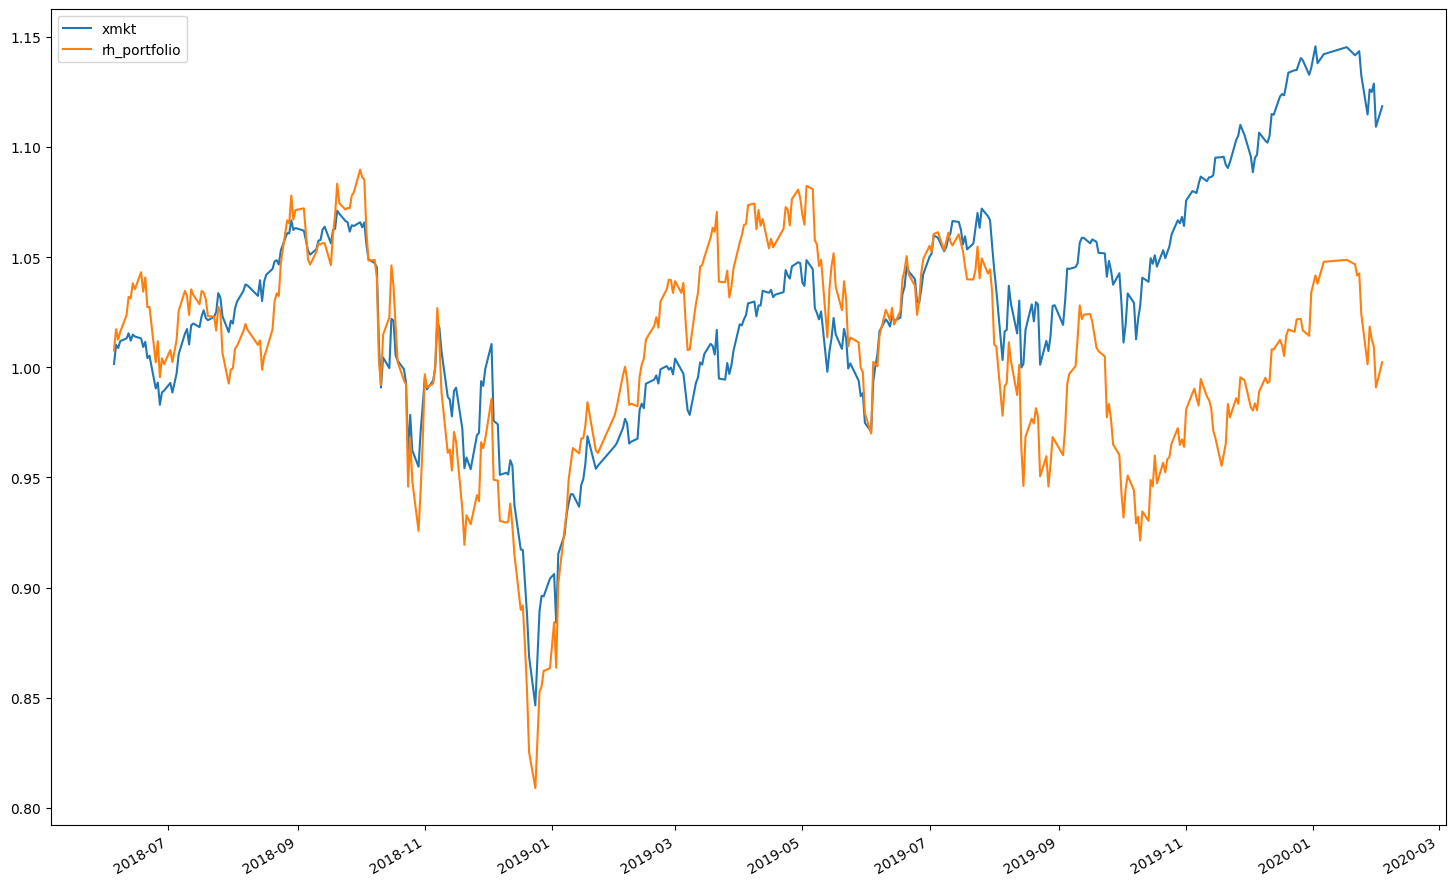

In [61]:
df_plot = (welch_factors[["xmkt", "rh_portfolio"]]/100+1)
df_plot.index = pd.to_datetime(df_plot.index, format="%Y%m%d")
df_plot.cumprod().plot(figsize=(18,12))

## Welch Regression

In [25]:
import pandas as pd
from config.constants import PROJECT_ROOT


#welch_factors = pd.read_csv(f"{PROJECT_ROOT}/jf-datashare/gabriel-cuevas/data/18_rwarh_d_1.csv", index_col=0)
#welch_factors.index = pd.to_datetime(welch_factors.index, format="%Y%m%d")
welch_factors = pd.read_csv(f"{PROJECT_ROOT}/jf-datashare/gabriel-cuevas/data/20_rwarh_m_1.csv", index_col=0)
welch_factors.index = pd.to_datetime(welch_factors.index, format="%Y%m")
welch_factors = welch_factors[welch_factors.index <= "2020-02-01"]
welch_factors

,pfioret100,xmkt,smb,hml,rmw,cma,rf,umd
yyyymm,,,,,,,,
2018-07-01,-0.426192,3.19,-1.95,0.57,1.53,0.40,0.16,-1.62
2018-08-01,7.802192,3.44,0.64,-3.92,-0.15,-2.47,0.16,5.21
2018-09-01,1.600102,0.06,-2.49,-1.63,0.59,1.26,0.15,-0.06
2018-10-01,-9.611172,-7.68,-4.51,3.46,0.91,3.45,0.19,-1.99
2018-11-01,-1.076780,1.69,-0.80,0.34,-0.63,0.33,0.18,-1.41
2018-12-01,-11.794557,-9.55,-2.99,-1.89,-0.09,0.15,0.19,1.83
2019-01-01,15.666751,8.41,3.05,-0.46,-0.65,-1.36,0.21,-8.65
2019-02-01,5.656301,3.40,1.79,-2.71,0.09,-1.47,0.18,0.81
2019-03-01,1.728574,1.10,-3.56,-4.19,0.86,-1.03,0.19,2.13


In [26]:
import statsmodels.api as sm

welch_factors["xr"] = welch_factors['pfioret100'] - welch_factors['rf']

X = welch_factors[['xmkt', 'smb', 'hml', 'rmw', 'cma', 'umd']]
y = welch_factors["xr"]

X = sm.add_constant(X)  # this adds the alpha term

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                     xr   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     25.11
Date:                Tue, 29 Apr 2025   Prob (F-statistic):           1.96e-06
Time:                        15:46:06   Log-Likelihood:                -40.026
No. Observations:                  20   AIC:                             94.05
Df Residuals:                      13   BIC:                             101.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6558      0.699      0.938      0.3

<Axes: xlabel='yyyymm'>

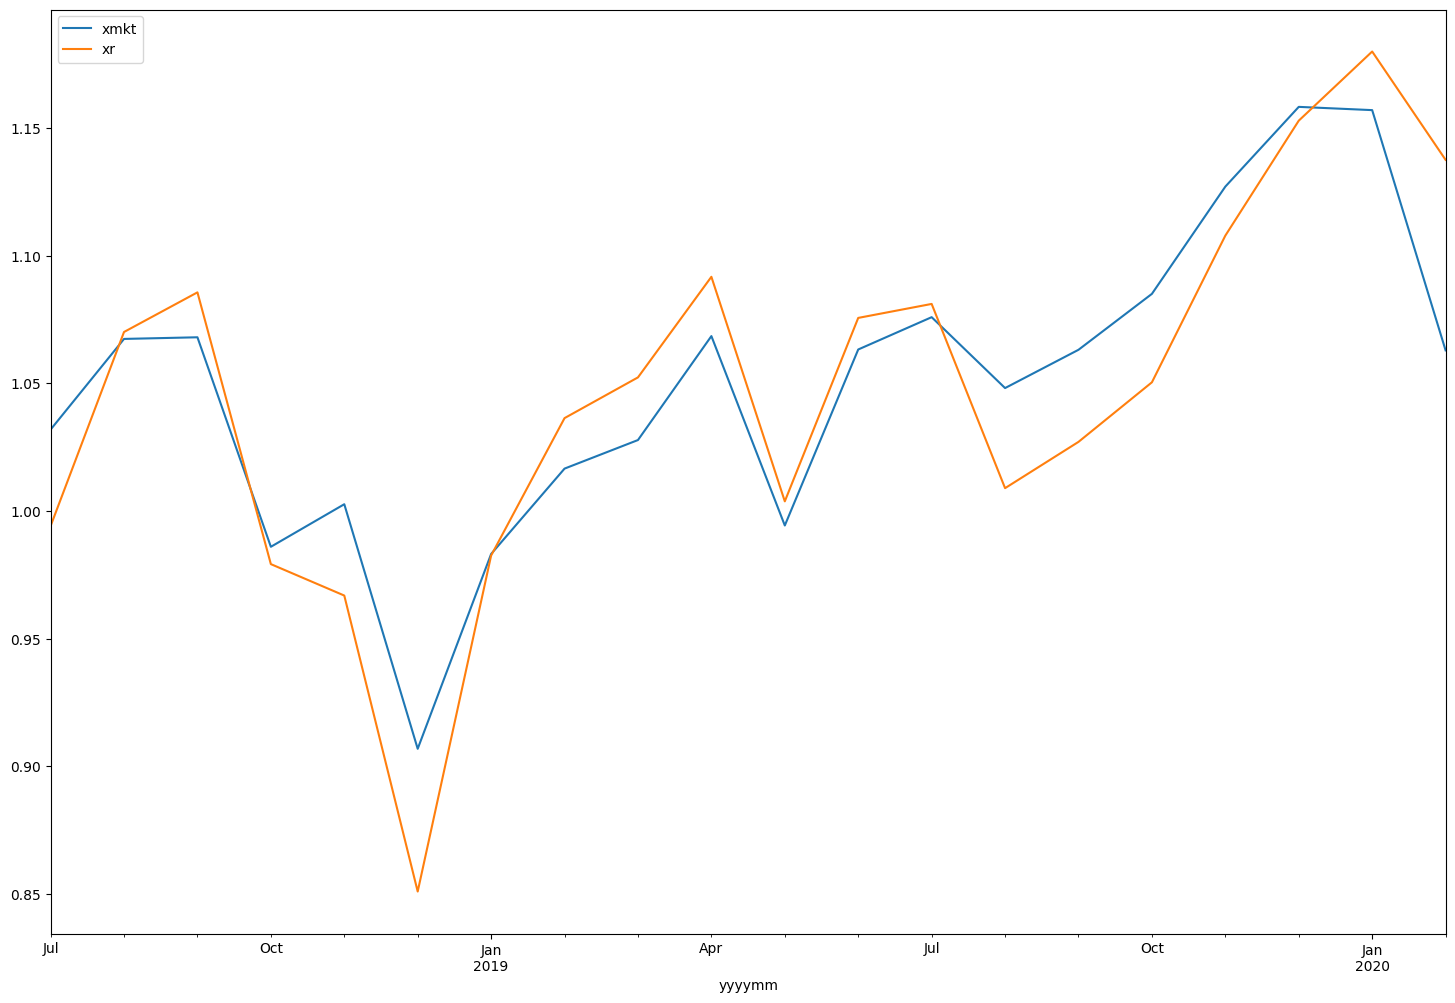

In [27]:
df_plot = (welch_factors[["xmkt", "xr"]]/100+1)
df_plot.index = pd.to_datetime(df_plot.index, format="%Y%m%d")
df_plot.cumprod().plot(figsize=(18,12))

## My regression

In [51]:
import numpy as np

from src import Analyzer
from src.utils.params import ReturnParams

return_params = ReturnParams(
    start_date=None,
    end_date="2020-02-03",
    cumulative=True,
    append_start=False
)

an_mine = Analyzer(compare_tickers=[], return_params=return_params, stocks_only=False, weights_application="number", dl_kwargs={"weights_method":"dollar"})

r_mine, h_mine = an_mine.build_returns()
r_mine = np.exp(r_mine)-1

2025-04-28 18:13:44,311 - src.analyzer - INFO - ############################## Analysis Started ############################## (analyzer.py:83)
2025-04-28 18:13:49,247 - src.analyzer - WARNING - Empty dataframe produced for tickers: [] (analyzer.py:175)


In [52]:
import pandas as pd 

index = []
for i in range(len(r_mine.index)):
    index.append(date_to_num(r_mine.index[i]))

r_mine.index = index

r_mine

welch_factors = pd.read_csv(f"{PROJECT_ROOT}/jf-datashare/gabriel-cuevas/data/18_rwarh_d_1.csv", index_col=0)
welch_factors


welch_factors = welch_factors.merge(r_mine["rh_portfolio"], left_index=True, right_index=True)[1:] # first day is zero
welch_factors.columns = [''.join(col.split()).lower() for col in welch_factors.columns]
welch_factors["rh_portfolio"] = welch_factors["rh_portfolio"]*100 # transform in pct
welch_factors

,pfioret100,xmkt,smb,hml,rmw,cma,rf,umd,rh_portfolio
20180605,0.838875,0.16,0.79,-0.43,0.23,0.11,0.006,0.29,0.989470
20180606,0.909019,0.86,-0.28,0.19,-0.02,0.15,0.006,-0.01,0.153225
20180607,-0.440410,-0.14,-0.24,0.91,0.17,0.59,0.006,-0.91,-0.214260
20180608,0.341546,0.31,0.05,-0.41,0.27,-0.19,0.006,-0.13,-0.516865
20180611,0.908464,0.12,0.15,-0.17,0.22,0.23,0.006,-0.64,1.127622
...,...,...,...,...,...,...,...,...,...
20200128,1.504464,1.02,-0.15,-0.43,0.15,-0.10,0.006,0.84,1.221767
20200129,-0.502798,-0.10,-0.45,-0.96,0.25,0.19,0.006,0.60,0.355782
20200130,-0.108565,0.34,-0.63,0.63,-0.38,-0.12,0.006,0.49,0.877142
20200131,-1.738466,-1.74,-0.53,-0.34,-0.58,-0.69,0.006,-0.23,-0.725999


In [53]:
import statsmodels.api as sm

welch_factors["xr"] = welch_factors['rh_portfolio'] - welch_factors['rf']

X = welch_factors[['xmkt', 'smb', 'hml', 'rmw', 'cma', 'umd']]
y = welch_factors["xr"]

X = sm.add_constant(X)  # this adds the alpha term

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     xr   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     542.7
Date:                Mon, 28 Apr 2025   Prob (F-statistic):          7.50e-188
Time:                        18:13:50   Log-Likelihood:                -249.33
No. Observations:                 404   AIC:                             512.7
Df Residuals:                     397   BIC:                             540.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1008      0.023     -4.427      0.0

<Axes: >

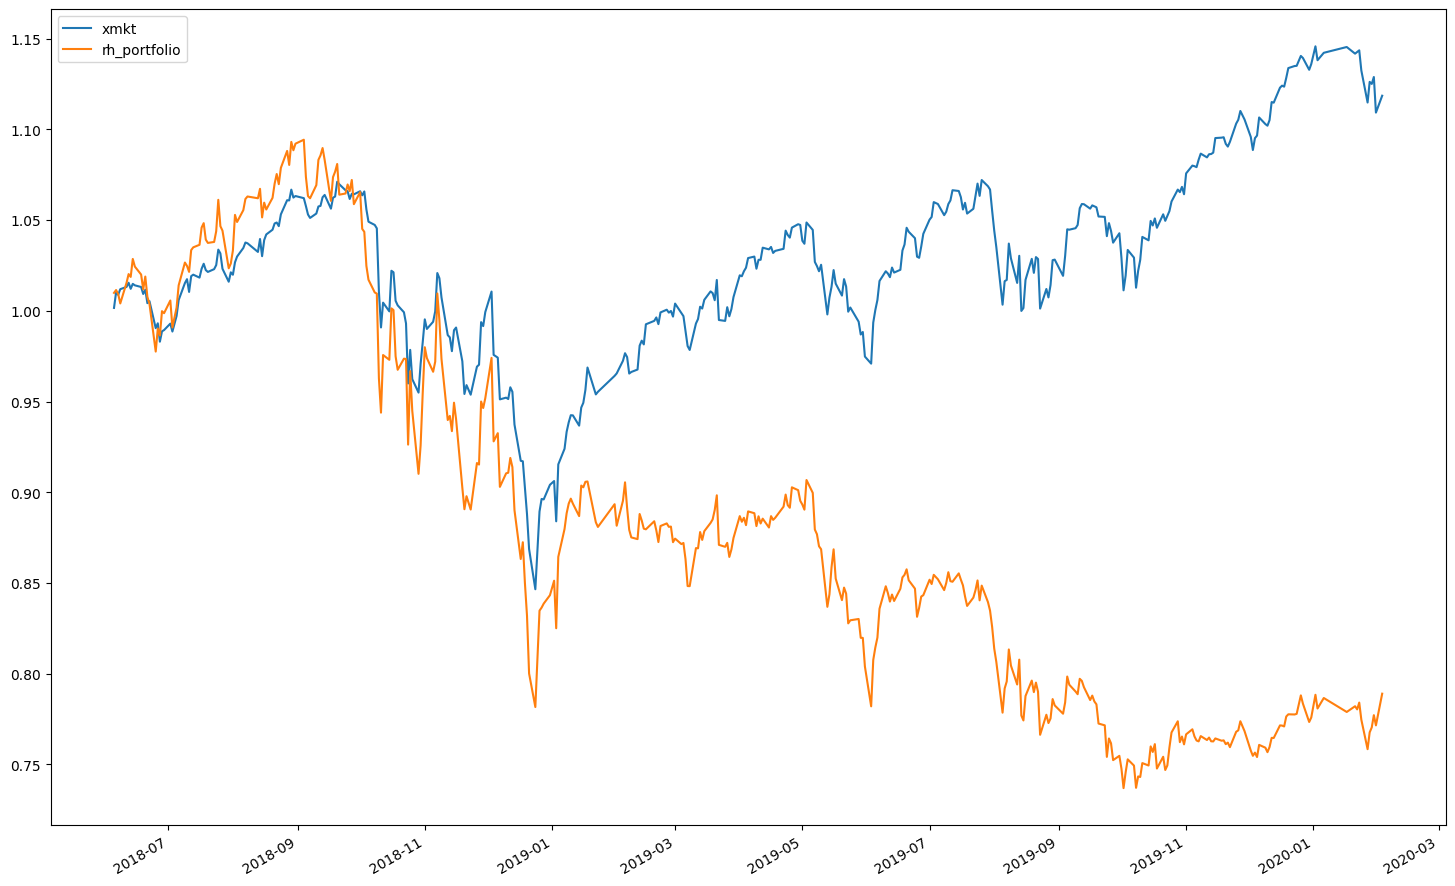

In [55]:
df_plot = (welch_factors[["xmkt", "rh_portfolio"]]/100+1)
df_plot.index = pd.to_datetime(df_plot.index, format="%Y%m%d")
df_plot.cumprod().plot(figsize=(18,12))

- fedyk with all securities

In [ ]:
import pandas as pd 

index = []
for i in range(len(r_fedyk.index)):
    index.append(date_to_num(r_fedyk.index[i]))

r_fedyk.index = index


welch_factors = pd.read_csv(f"{PROJECT_ROOT}/jf-datashare/gabriel-cuevas/data/18_rwarh_d_1.csv", index_col=0)
welch_factors


welch_factors = welch_factors.merge(r_fedyk["rh_portfolio"], left_index=True, right_index=True)[1:] # first day is zero
welch_factors.columns = [''.join(col.split()).lower() for col in welch_factors.columns]
welch_factors["rh_portfolio"] = welch_factors["rh_portfolio"]*100 # transform in pct
welch_factors

,pfioret100,xmkt,smb,hml,rmw,cma,rf,umd,rh_portfolio
20180605,0.838875,0.16,0.79,-0.43,0.23,0.11,0.006,0.29,0.766697
20180606,0.909019,0.86,-0.28,0.19,-0.02,0.15,0.006,-0.01,0.956655
20180607,-0.440410,-0.14,-0.24,0.91,0.17,0.59,0.006,-0.91,-0.455910
20180608,0.341546,0.31,0.05,-0.41,0.27,-0.19,0.006,-0.13,0.347463
20180611,0.908464,0.12,0.15,-0.17,0.22,0.23,0.006,-0.64,0.734800
...,...,...,...,...,...,...,...,...,...
20200807,-0.300979,0.02,1.52,2.34,0.49,0.17,0.000,-2.01,-0.385947
20200810,1.828497,0.24,1.27,1.66,0.86,1.24,0.000,-2.82,1.901383
20200811,-2.154837,-0.83,0.18,1.57,0.89,0.07,0.000,-2.21,-1.992173
20200812,0.948135,1.40,-0.81,-1.30,0.95,-0.14,0.000,1.87,0.667162


In [ ]:
import statsmodels.api as sm

welch_factors["xr"] = welch_factors['rh_portfolio'] - welch_factors['rf']

X = welch_factors[['xmkt', 'smb', 'hml', 'rmw', 'cma', 'umd']]
y = welch_factors["xr"]

X = sm.add_constant(X)  # this adds the alpha term

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     xr   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     769.5
Date:                Mon, 28 Apr 2025   Prob (F-statistic):          3.39e-258
Time:                        17:56:31   Log-Likelihood:                -530.39
No. Observations:                 538   AIC:                             1075.
Df Residuals:                     531   BIC:                             1105.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0309      0.028      1.088      0.2